# Audio to Images Utils
by Wael Radwan

#### Library used to prepare datasets from data
continans various tools to prepare the training dataset and testing dataset

mainly used to randomize files of the dataset
divide the dataset into traininig and testing dataset
randomize the test files

<b> the main idea here is to load the dataset into classified directories then use this utility to create train/test dataset with the randomization </b>

In [47]:
from __future__ import print_function
import os.path
from collections import defaultdict
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import time
%matplotlib notebook

%matplotlib inline
import seaborn
import  scipy

# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

import cv2

#### Convert audio file to mel spectogram npy
* audio_path : path of the input audio file (.mp3)
* n_mels : number of mels of the output mel spectogram
* mel_path : path to .npy file 

In [2]:
def audio_mel_to_npy(audio_path,n_mels,mel_path):
    # first read the audio file  
    y, sr = librosa.load(audio_path)
    # create log mel spectogram for the audio file
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    # generate .npy file with log mel spectogram
    np.save(mel_path, log_S)

#### cut audio into sliding windows of ~5s with ~2-3s intervals. (using .npy files as basis)
* npy_audio_path
* feature_dir
* out_file_prefix
* interval_size


return list of .npy files generated

In [3]:
def cut_npy_audio_file(npy_audio_path,feature_dir,out_file_prefix,interval_size):

    aud_file = np.load(npy_audio_path)
    pointer = 0
    counter = 0
    aud_file_length = aud_file.shape[1]
    aud_files_list =[]
    while (pointer<aud_file_length):
        counter = counter+1
        result = np.zeros((aud_file.shape[0],interval_size))
        result[:,:aud_file[:,pointer:pointer+interval_size].shape[1]] = aud_file[:,pointer:pointer+interval_size]
        out_file_name = out_file_prefix+'_'+str(counter)+'.npy'
        np.save(feature_dir+out_file_name, result)
        pointer = pointer+interval_size 
        aud_files_list.append(out_file_name)
    return(aud_files_list)

#### convert .npy file with MEL/MFCC content to image (png)
* filename input file to be converted
* new_file_name new image file name
* figsize is the size of the output figure

In [24]:
def conv_npy_audio_to_mel_image(filename,new_file_name,figsize):
    
    #figsize=(2, 2)
    fig=plt.figure(figsize=figsize)
    aud_file = np.load(filename)
    plt.imshow(aud_file, aspect='auto', interpolation='none', origin='lower')
    fig.savefig(new_file_name,transparent =True)
    del(aud_file)
    plt.close(fig)

In [25]:
def gen_img_files_from_npy_list(npy_files):
    #then for each small npy file generate image
    for i in range(len(npy_files)):
        filename=inputDir+npy_files[i]
        #aud_file = np.load(filename)
        pointer = 0
        print(filename)
        pngname = filename.replace('.npy', '.png')
        print(pngname)
        conv_npy_audio_to_mel_image(filename,pngname,figsize)

In [46]:
def show_img_from_npy_list(npy_files):

    w=10
    h=10
    fig=plt.figure(figsize=(20, 20))
    columns = 4
    rows = 5
    for index in range(len(npy_files)):
        filename=inputDir+npy_files[index]
        #aud_file = np.load(filename)
        pointer = 0
        pngname = filename.replace('.npy', '.png')
        fig.add_subplot(rows, columns, index+1)
        img = cv2.imread(pngname)
        plt.imshow(img)

# TEST AREA

In [27]:
conv_npy_audio_to_mel_image('/ds/dataset/quran/999/999_out_1.npy','2.png',(3,3))

###### lets test for 1 file

In [51]:
inputDir= '/ds/dataset/quran/999'
filename='999_0002.mp3'
n_mels=100
figsize=(2, 2)
mel_npy_path='/ds/dataset/quran/999/mel_999_0002'
feature_dir='/ds/dataset/quran/999/'

/ds/dataset/quran/999/999_0002.mp3


/ds/dataset/quran/999/999_0002.mp3
/ds/dataset/quran/999/999_0002.npy
999_0002
/ds/dataset/quran/999999_0002_1.npy
/ds/dataset/quran/999999_0002_1.png
/ds/dataset/quran/999999_0002_2.npy
/ds/dataset/quran/999999_0002_2.png
/ds/dataset/quran/999999_0002_3.npy
/ds/dataset/quran/999999_0002_3.png


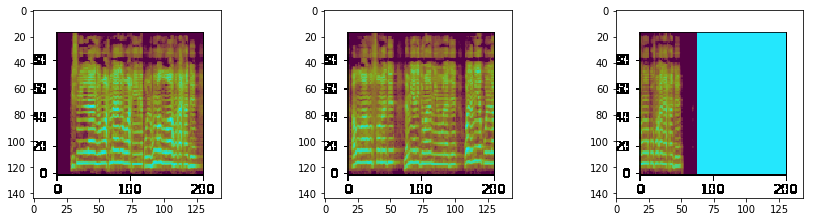

In [54]:
if filename.endswith('.mp3'):
    # generate the full file name
    fullfilename=inputDir+'/'+filename
    print(fullfilename)
    # genereate the .npy file from the original file by replacing .mp3 with .npy
    melnpyname = fullfilename.replace('.mp3', '.npy')
    print(melnpyname)
    # convert mp3 to mel .npy file
    audio_mel_to_npy(fullfilename,n_mels,melnpyname)
    # cut the generated .npy file into smaller equal sized files.
    slidefilebase = filename.replace('.mp3','')
    print(slidefilebase)
    npy_files=cut_npy_audio_file(melnpyname,inputDir,slidefilebase,200)
    #then for each small npy file generate image
    gen_img_files_from_npy_list(npy_files)
    show_img_from_npy_list(npy_files)

In [8]:
sample_df = pd.DataFrame()
for i in range(len(npy_files)):
    filename=feature_dir+npy_files[i]
    aud_file = np.load(filename)
    pointer = 0
    print(filename)
    pngname = filename.replace('.npy', '.png')
    conv_npy_audio_to_mel_image(filename,pngname,figsize)
    
    sample_df.at[i, 'filename']=npy_files[i]
    sample_df.at[i, 'size']=aud_file.size
   # result_list.append([row.file, row.length, row.sr, song[:,pointer:pointer+200].size, row.length_s, counter])
plt.show()

NameError: name 'npy_files' is not defined

#### main function
here we will list the audit directory and convert each file into png file

In [26]:
inputDir= '/ds/dataset/quran/999'

# list the audio directory
for filename in os.listdir(inputDir):
        # make sure that we are processing mp3 files
        if filename.endswith('.mp3'):
            # generate the full file name
            fullfilename=inputDir+'/'+filename
            print(fullfilename)
            # genereate the .npy file from the original file by replacing .mp3 with .npy
            melnpyname = fullfilename.replace('.mp3', '.npy')
            print(melnpyname)
            # convert mp3 to mel .npy file
            audio_mel_to_npy(fullfilename,n_mels,melnpyname)
            # cut the generated .npy file into smaller equal sized files.
            slidefilebase = filename.replace('.mp3','')
            print(slidefilebase)
            npy_files=cut_npy_audio_file(melnpyname,inputDir,slidefilebase,200)
            #then for each small npy file generate image
            gen_img_files_from_npy_list(npy_files)

/ds/dataset/quran/999//999_0015.mp3
/ds/dataset/quran/999//999_0015.npy
999_0015
/ds/dataset/quran/999/999_0015_1.npy
/ds/dataset/quran/999/999_0015_1.png
/ds/dataset/quran/999/999_0015_2.npy
/ds/dataset/quran/999/999_0015_2.png
/ds/dataset/quran/999/999_0015_3.npy
/ds/dataset/quran/999/999_0015_3.png
/ds/dataset/quran/999//999_0021.mp3
/ds/dataset/quran/999//999_0021.npy
999_0021
/ds/dataset/quran/999/999_0021_1.npy
/ds/dataset/quran/999/999_0021_1.png
/ds/dataset/quran/999/999_0021_2.npy
/ds/dataset/quran/999/999_0021_2.png
/ds/dataset/quran/999/999_0021_3.npy
/ds/dataset/quran/999/999_0021_3.png
/ds/dataset/quran/999/999_0021_4.npy
/ds/dataset/quran/999/999_0021_4.png
/ds/dataset/quran/999/999_0021_5.npy
/ds/dataset/quran/999/999_0021_5.png
/ds/dataset/quran/999//999_0030.mp3
/ds/dataset/quran/999//999_0030.npy
999_0030
/ds/dataset/quran/999/999_0030_1.npy
/ds/dataset/quran/999/999_0030_1.png
/ds/dataset/quran/999/999_0030_2.npy
/ds/dataset/quran/999/999_0030_2.png
/ds/dataset/quran

/ds/dataset/quran/999/999_0027_5.npy
/ds/dataset/quran/999/999_0027_5.png
/ds/dataset/quran/999//999_0016.mp3
/ds/dataset/quran/999//999_0016.npy
999_0016
/ds/dataset/quran/999/999_0016_1.npy
/ds/dataset/quran/999/999_0016_1.png
/ds/dataset/quran/999/999_0016_2.npy
/ds/dataset/quran/999/999_0016_2.png
/ds/dataset/quran/999/999_0016_3.npy
/ds/dataset/quran/999/999_0016_3.png
/ds/dataset/quran/999//999_0001.mp3
/ds/dataset/quran/999//999_0001.npy
999_0001
/ds/dataset/quran/999/999_0001_1.npy
/ds/dataset/quran/999/999_0001_1.png
/ds/dataset/quran/999/999_0001_2.npy
/ds/dataset/quran/999/999_0001_2.png
/ds/dataset/quran/999/999_0001_3.npy
/ds/dataset/quran/999/999_0001_3.png
/ds/dataset/quran/999/999_0001_4.npy
/ds/dataset/quran/999/999_0001_4.png
/ds/dataset/quran/999/999_0001_5.npy
/ds/dataset/quran/999/999_0001_5.png
/ds/dataset/quran/999//999_0013.mp3
/ds/dataset/quran/999//999_0013.npy
999_0013
/ds/dataset/quran/999/999_0013_1.npy
/ds/dataset/quran/999/999_0013_1.png
/ds/dataset/quran

In [28]:
npy_files

['999_0010_1.npy', '999_0010_2.npy', '999_0010_3.npy', '999_0010_4.npy']

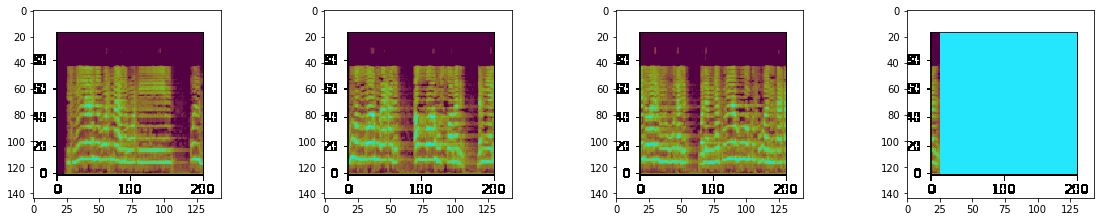

In [48]:
show_img_from_npy_list(npy_files)